# **Graduate Rotational Internship Program**

# The Sparks Foundation



Author: Sarvagya Kumar

# **TASK 6: Prediction using Decision Tree Algorithm**
#GRIPJAN21

**IMPORTING NECESSARY PACKAGES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn import datasets
from sklearn.metrics import accuracy_score
%matplotlib inline

**READING THE IRIS DATA SET AND SEPARATING THE TRAINING DATA AND TARGET VARIABLE**

In [2]:
iris= pd.read_csv("Iris.csv")
iris.drop(labels='Id', axis=1, inplace=True)
irisY=iris.Species
irisX= iris.drop(labels='Species', axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Checking for null values

In [3]:
irisX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
irisY.isna().sum()

0

**EXPLORATORY DATA ANALYSIS**

1. Checking the range of values the features take

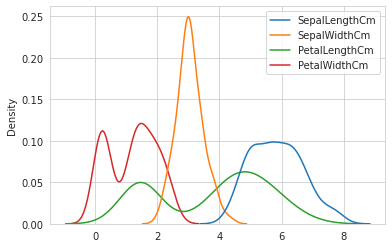

In [5]:
sns.kdeplot(data=iris)

2. Checking if the data set is balanced or not

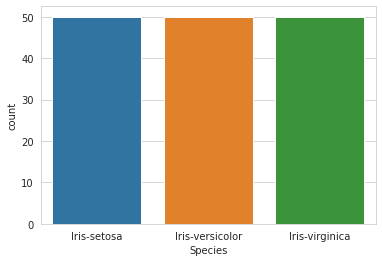

In [6]:
ax = sns.countplot(x="Species", data=iris)

3. Plotting features of the same biological structure, example petal and sepal and examining them for each species

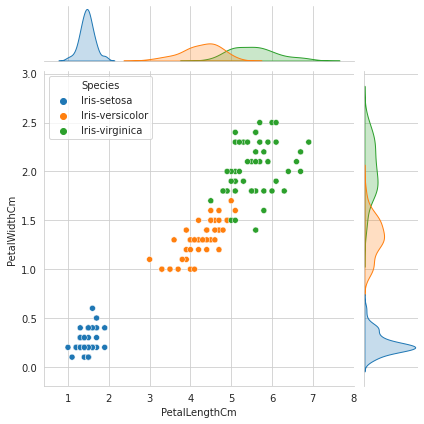

In [7]:
ax1= sns.jointplot(data=iris, x="PetalLengthCm", y="PetalWidthCm", hue="Species")

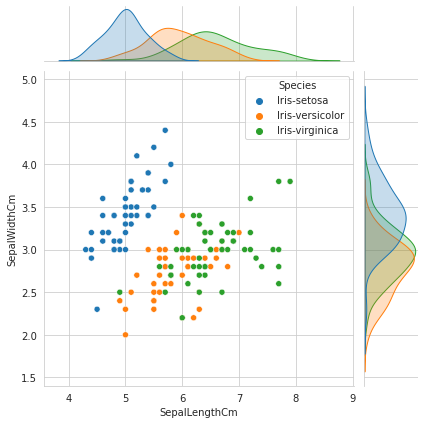

In [8]:
ax2= sns.jointplot(data=iris, x="SepalLengthCm", y="SepalWidthCm", hue="Species")

4. Examining distribution of different features as per the species

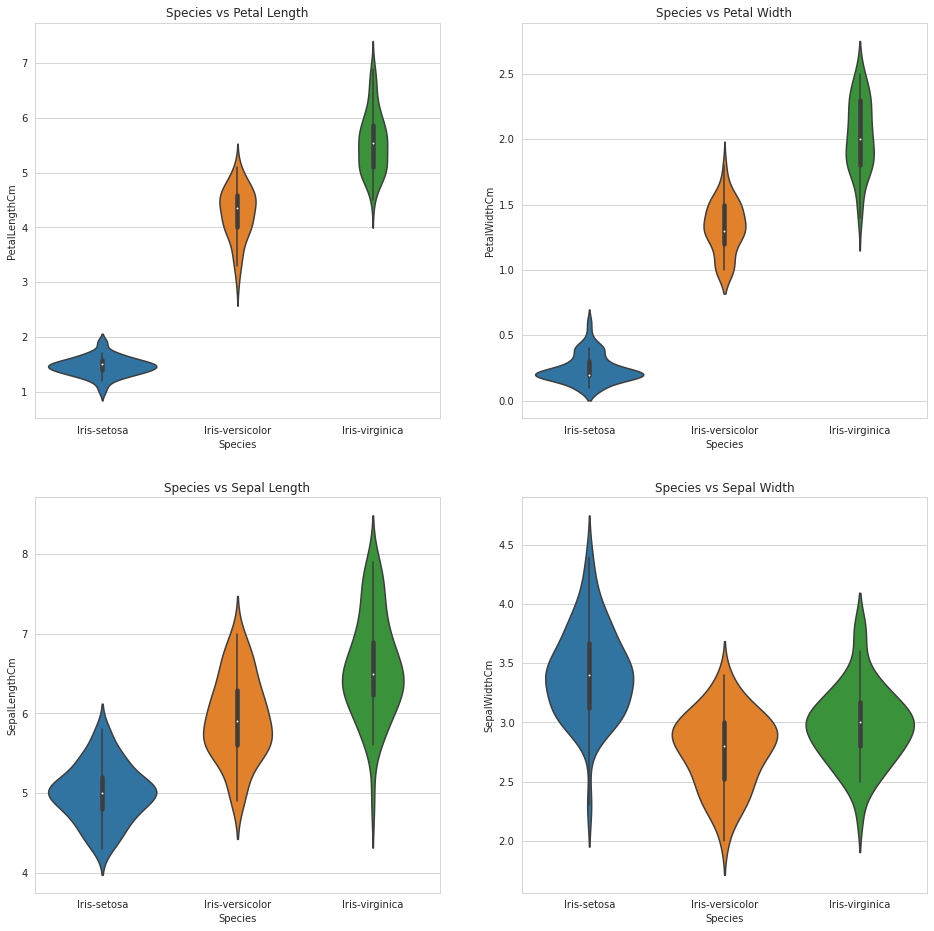

In [9]:
f,ax=plt.subplots(2,2,figsize=(16,16))
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=8, ax=ax[0][0])
ax[0][0].set_title('Species vs Petal Length')

sns.violinplot(x="Species", y="PetalWidthCm", data=iris, size=8, ax=ax[0][1])
ax[0][1].set_title('Species vs Petal Width')

sns.violinplot(x="Species", y="SepalLengthCm", data=iris, size=8, ax=ax[1][0])
ax[1][0].set_title('Species vs Sepal Length')

sns.violinplot(x="Species", y="SepalWidthCm", data=iris, size=8, ax=ax[1][1])
ax[1][1].set_title('Species vs Sepal Width')
plt.show()

**DATA PREPROCESSING**

Splitting the dataset into training and testing data

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(irisX, irisY,test_size=0.2,random_state=42)

Label Encoding the categorical target variables

In [11]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(y_train)

y_train = label_encoder.transform(y_train)
y_test= label_encoder.transform(y_test)

Converting the dataframe to a numpy array

In [12]:
X_train= X_train.to_numpy()
X_test=  X_test.to_numpy()

**CREATING A DECISION TREE CLASSIFIER AND FITTING THE DATA SET**

In [13]:
clf = DecisionTreeClassifier()
model= clf.fit(X_train,y_train)
y_pred= model.predict(X_test)


**SEEING THE ACCURACY SCORE FOR THE TEST SET**

In [14]:
accuracy_score(y_test, y_pred)

1.0

**CREATING FEATURE AND TARGET CLASS LIST**

In [15]:
feature_name=list(irisX.columns)
class_name=list(irisY.unique())
print(feature_name)
print(class_name)

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


**VISUALIZING THE TREE GRAPHICALLY**



**1. Visualize Decision Tree with graphviz**


Installing pydotplus which provides a Python Interface to Graphviz’s Dot language.


In [16]:
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.




*   StringIO gives a fake file object for textual data
*   Image from the display module makes PNG, JPEG, GIF image object given raw data
*   export_graphviz function generates a GraphViz representation of the decision tree, which is then written into out_file








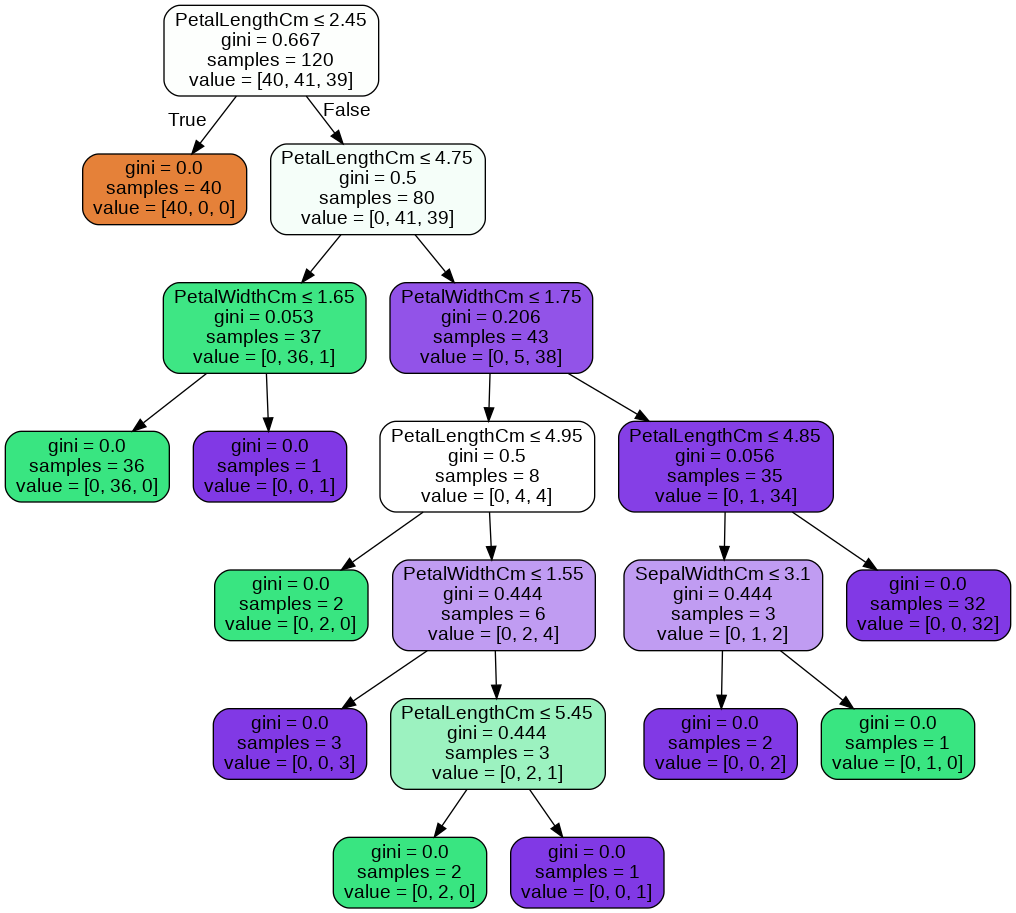

In [17]:

from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=feature_name,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Saving the image as png

In [18]:
graph.write_png("graphviz.png")

True

**2. Plot Decision Tree with dtreeviz Package**

In [19]:
!pip install dtreeviz

Fit nd arrays X_train and y_train on the clf classifer model and vizualize it graphically

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


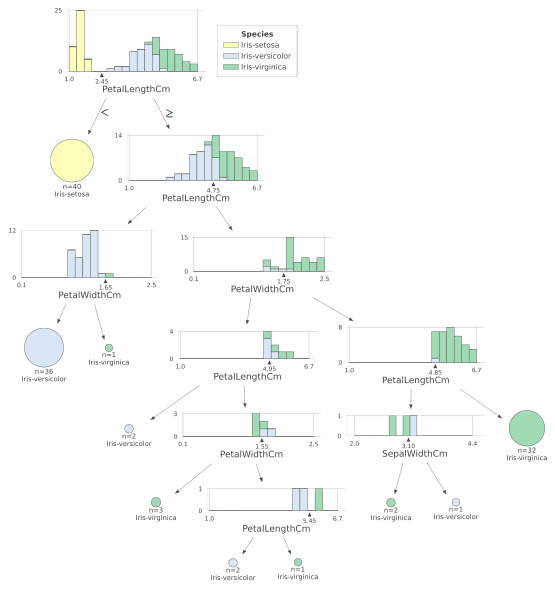

In [20]:
from dtreeviz.trees import dtreeviz
#to ignore deprecation warning
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)    
viz = dtreeviz(clf, 
               X_train, 
               y_train,
               target_name='Species',
               feature_names=feature_name, 
               class_names= list(label_encoder.classes_)  
              )  
            
viz

Saving the image as svg file

In [21]:
viz.save("dtreeviz.svg")

**RESULT**

Hence we see that the classifier predicts right classes for the iris dataset and is visualized graphically as to how it classifies each sample. 